In [174]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sympy as sy

# 1)
- Menggunakan pandas untuk memuat data.

- Menggunakan numpy untuk mengubah dataset tersebut menjadi matrix.

- Menggunakan rumus linear kombinasi untuk mencari harga produk.

# Data Loading :

- Menyusun dataset menjadi sebuah DataFrame.

In [140]:
# Hari ke-	A	B	C	D	E	F	G	H	I	J	Pendapatan
# 1	14	19	2	44	9	1	3	40	17	22	1402500
# 2	7	26	26	24	54	2	2	4	22	18	2325000
# 3	37	54	1	43	46	23	37	36	18	17	3307000
# 4	19	19	45	41	43	21	38	51	56	37	4077000
# 5	47	28	50	10	44	54	3	47	2	21	3998000
# 6	12	41	31	25	44	13	16	9	47	3	2674500
# 7	20	19	53	56	34	6	60	37	35	49	4014000
# 8	60	44	1	16	9	24	55	55	30	10	2754500
# 9	41	55	50	28	59	54	40	9	45	34	5511500
# 10	14	11	39	2	26	17	51	19	38	39	3338500

dict0 = {
    'Hari ke-' : [1,2,3,4,5,6,7,8,9,10],
    'A' : [14,7,37,19,47,12,20,60,41,14],
    'B' : [10,26,54,19,28,41,19,44,55,14],
    'C' : [2,26,1,45,50,31,53,1,50,11],
    'D' : [44,24,43,41,10,25,56,16,28,39],
    'E' : [9,54,46,43,44,44,34,9,59,2],
    'F' : [40,4,36,51,47,9,37,55,9,51],
    'G' : [3,2,37,38,3,16,60,55,40,51],
    'H' : [40,4,36,51,47,9,37,55,9,19],
    'I' : [17,22,18,56,2,47,35,30,45,19],
    'J' : [22,18,17,37,21,3,49,10,34,39],
    'Pendapatan' : [1402500, 2325000, 330700, 4077000, 3998000, 2674500, 4014000, 2754500, 5511500, 3338500]}

df = pd.DataFrame(dict0)

df

,Hari ke-,A,B,C,D,E,F,G,H,I,J,Pendapatan
0,1,14,10,2,44,9,40,3,40,17,22,1402500
1,2,7,26,26,24,54,4,2,4,22,18,2325000
2,3,37,54,1,43,46,36,37,36,18,17,330700
3,4,19,19,45,41,43,51,38,51,56,37,4077000
4,5,47,28,50,10,44,47,3,47,2,21,3998000
5,6,12,41,31,25,44,9,16,9,47,3,2674500
6,7,20,19,53,56,34,37,60,37,35,49,4014000
7,8,60,44,1,16,9,55,55,55,30,10,2754500
8,9,41,55,50,28,59,9,40,9,45,34,5511500
9,10,14,14,11,39,2,51,51,19,19,39,3338500


Mengubah DataFrame dari library pandas menjadi numpy untuk di ubah menjadi matrix.

In [141]:
array = df.to_numpy() #Mengubah dataset tersebut menjadi numpy.

In [142]:
print(array)
np.shape(array)

[[      1      14      10       2      44       9      40       3      40
       17      22 1402500]
 [      2       7      26      26      24      54       4       2       4
       22      18 2325000]
 [      3      37      54       1      43      46      36      37      36
       18      17  330700]
 [      4      19      19      45      41      43      51      38      51
       56      37 4077000]
 [      5      47      28      50      10      44      47       3      47
        2      21 3998000]
 [      6      12      41      31      25      44       9      16       9
       47       3 2674500]
 [      7      20      19      53      56      34      37      60      37
       35      49 4014000]
 [      8      60      44       1      16       9      55      55      55
       30      10 2754500]
 [      9      41      55      50      28      59       9      40       9
       45      34 5511500]
 [     10      14      14      11      39       2      51      51      19
       19      39

(10, 12)

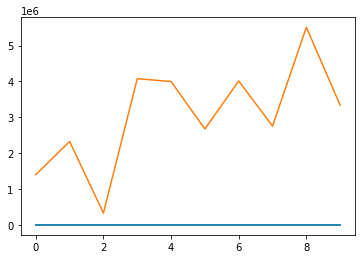

In [143]:
plt.plot(array)

# Menggunakan rumus linear transformasi untuk mencari harga tersebut.

In [210]:
# Sebuah matrix berupa binary (0,1)
# berasal dari np.random.randint(0,2, size=(10,10))
randmat = np.array([([[0, 0, 1, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 0, 1, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 1, 1, 0, 1, 1]])])

In [214]:
x = df['A'], df['B'], df['C'], df['D'], df['E'], df['F'], df['G'], df['H'], df['I'], df['J']
mat = np.array(x)
print(mat)
np.shape(mat)

[[14  7 37 19 47 12 20 60 41 14]
 [10 26 54 19 28 41 19 44 55 14]
 [ 2 26  1 45 50 31 53  1 50 11]
 [44 24 43 41 10 25 56 16 28 39]
 [ 9 54 46 43 44 44 34  9 59  2]
 [40  4 36 51 47  9 37 55  9 51]
 [ 3  2 37 38  3 16 60 55 40 51]
 [40  4 36 51 47  9 37 55  9 19]
 [17 22 18 56  2 47 35 30 45 19]
 [22 18 17 37 21  3 49 10 34 39]]


(10, 10)

In [171]:
res = np.linalg.solve(mat, randmat)
print(res)

[[[-2.83444047e-02  2.52895954e-02  3.72941556e-03  4.48630017e-03
    5.52195532e-02 -4.90786212e-02  8.52933463e-03  1.81464870e-02
    2.70997606e-02 -3.85873398e-02]
  [-1.70066288e-01  8.80447267e-02 -2.42327174e-01  6.78858672e-02
    1.54195729e-01 -5.95655497e-01 -2.37050578e-01 -7.59430195e-02
    1.56775844e-02 -2.67348425e-01]
  [ 1.09934582e-01 -6.88075292e-02  1.13416240e-01 -6.86512758e-02
   -1.16673015e-01  3.32978737e-01  1.30061326e-01  9.33656274e-03
   -4.26412364e-02  1.48978123e-01]
  [ 1.21469224e-01 -8.83074152e-02  8.12021812e-02 -3.52538508e-02
   -1.13046822e-01  2.86054448e-01  9.58373106e-02 -6.82148645e-03
   -4.08847351e-02  1.45952307e-01]
  [ 2.72863252e-02  5.18655961e-03  3.05733833e-02  1.01271922e-02
   -6.26498086e-03  4.39382898e-02  2.55688811e-02  2.29305788e-02
    4.82679162e-03  2.93397292e-02]
  [-3.80457089e-02  4.63052700e-02  4.81228783e-04  4.49898640e-02
    3.68278898e-03 -5.29842102e-02 -4.54786970e-03  6.86766260e-02
    2.56941204e-

# 2)
- Menggunakan integral untuk menentukan luas kota negara swiss dan koordinatnya

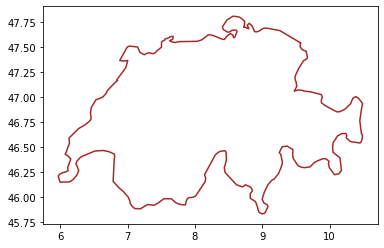

In [205]:
plt.plot(df2['longitude'], df2['latitude'], color='brown')

In [147]:
df2 = pd.read_csv('Swiss_boundaries.txt')
df2

,longitude,latitude
0,9.56672,47.54045
1,9.55980,47.50209
2,9.59660,47.46944
3,9.64965,47.45861
4,9.67035,47.39069
...,...,...
273,9.03333,47.68833
274,9.08264,47.68541
275,9.26110,47.66284
276,9.47832,47.57585


# Differensial :

In [203]:
der1 =np.diff(df2['latitude'])/np.diff(df2['longitude'])

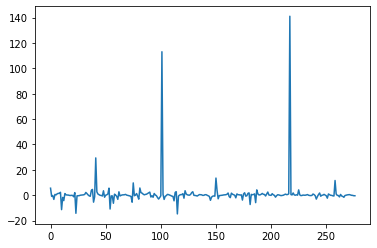

In [204]:
plt.plot(der1)

In [208]:
df2.min()

longitude     5.96701
latitude     45.82944
dtype: float64

In [209]:
df2.max()

longitude    10.48821
latitude     47.80666
dtype: float64